### Business Problem: 
In order to effectively produce quality decisions in the modern credit card industry, knowledge  must be gained through effective data analysis and modeling. Through the use of dynamic data driven decision-making tools and procedures, information can be gathered to successfully evaluate  all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries  across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud, and  collections, and respond to customer requests for help with proactive offers and service. 

Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the  customers spend & repayment behavior. 


### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

### Importing the Data

In [3]:
cust_Acq = pd.read_csv('Customer Acqusition.csv')
cust_Acq.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
repay = pd.read_csv('Repayment.csv')
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [5]:
spend = pd.read_csv('spend.csv')
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [6]:
#shape of Dfs
cust_Acq.shape

(100, 8)

In [7]:
repay.shape

(1523, 5)

In [8]:
spend.shape

(1500, 5)

In [9]:
# Dropping Un-named column from repay df

repay.drop('Unnamed: 4', axis=1, inplace=True)

In [10]:
repay.head()

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [11]:
# changing the name and dtype of Sl No in Spend Df

spend.rename({'Sl No:':'SL No:'}, axis =1, inplace=True)

In [12]:
spend['SL No:'] = pd.to_numeric(spend['SL No:'], errors = "coerce")

In [13]:
spend.head()

 # As Spend col has all the data in int and there are no missings, it'll give int64

,SL No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [14]:
# Merging the Dfs

# step 1: Combining the Customer Acquisition details with Spending txn

cust_Acq_spend = pd.merge(left=cust_Acq, right=spend, on='Customer')
cust_Acq_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [15]:
cust_Acq_spend.shape

(1500, 12)

In [16]:
# checking for null values in cust_Acq_spend :

cust_Acq_spend.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
SL No:      0
Month       0
Type        0
Amount      0
dtype: int64

In [17]:
# Step 2: Merging the Dfs -- Combining the Customer Acquisition details with Repayment details

cust_Acq_repay = pd.merge(left=cust_Acq, right=repay, on='Customer', how='outer')
cust_Acq_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88


In [18]:
cust_Acq_repay.shape

(1523, 11)

In [19]:
# checking for null values in cust_Acq_Repay:
cust_Acq_repay.isnull().sum()

No          23
Customer    23
Age         23
City        23
Product     23
Limit       23
Company     23
Segment     23
SL No:      24
Month       23
Amount      23
dtype: int64

In [20]:
cust_Acq_repay.tail(23)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# dropping row with index from as all are missing values

cust_Acq_repay.drop(cust_Acq_repay.index[1500:1523],inplace=True)

In [22]:
# checking again for null values in cust_Acq_Repay:
cust_Acq_repay.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
SL No:      1
Month       0
Amount      0
dtype: int64

In [23]:
# filling na in SL No: cust_Acq_repay with 1

cust_Acq_repay = cust_Acq_repay.fillna(1)

In [24]:
cust_Acq_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [25]:
cust_Acq_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1.0,12-Jan-04,495414.75
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88


In [26]:
cust_Acq_repay.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
SL No:      0
Month       0
Amount      0
dtype: int64

In [27]:
# Step 3 of Merging tables: Combine Cust_Acq_spend with cust_Acq_Repay:

csr = pd.merge(left=cust_Acq_spend, right=cust_Acq_repay, 
               on=['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company','Segment','SL No:'])
csr.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month_x,Type,Amount_x,Month_y,Amount_y
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,3-Jan-04,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,15-Jan-04,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,25-Jan-04,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,17-Jan-05,165972.88


In [28]:
# shape of the merged df
csr.shape

(1500, 14)

In [29]:
## Renaming the columns in the combined data: csr

csr.rename(columns = {'Amount_x':'Spend_Amt','Amount_y':'Repay_Amt', 'Month_x':'Spend_Month','Month_y':'Repay_Month'}, inplace=True)

In [30]:
csr

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Spend_Month,Type,Spend_Amt,Repay_Month,Repay_Amt
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,12-Jan-04,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,3-Jan-04,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,15-Jan-04,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,25-Jan-04,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,25-Jan-04,310992.30
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,12-Jan-04,121874.90
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,3-Jan-04,337815.57
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,15-Jan-04,25682.73


In [31]:
# Dropping off columns No and SL NO columns from the final merged df: csr 
csr.drop(columns=['No', 'SL No:'], inplace=True)

In [32]:
# Changing the dtype of Spend_Month and Repay_Month to datetime from object

csr.Spend_Month = pd.to_datetime(csr.Spend_Month, format = '%d-%b-%y')
csr.Repay_Month = pd.to_datetime(csr.Repay_Month, format = '%d-%b-%y')

In [33]:
csr.Spend_Month

0      2004-01-12
1      2004-01-03
2      2004-01-15
3      2004-01-25
4      2005-01-17
          ...    
1495   2004-01-25
1496   2004-01-12
1497   2004-01-03
1498   2004-01-15
1499   2004-01-25
Name: Spend_Month, Length: 1500, dtype: datetime64[ns]

In [34]:
csr.Repay_Month

0      2004-01-12
1      2004-01-03
2      2004-01-15
3      2004-01-25
4      2005-01-17
          ...    
1495   2004-01-25
1496   2004-01-12
1497   2004-01-03
1498   2004-01-15
1499   2004-01-25
Name: Repay_Month, Length: 1500, dtype: datetime64[ns]

In [35]:
#info about the df
csr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Customer     1500 non-null   object        
 1   Age          1500 non-null   int64         
 2   City         1500 non-null   object        
 3   Product      1500 non-null   object        
 4   Limit        1500 non-null   float64       
 5   Company      1500 non-null   object        
 6   Segment      1500 non-null   object        
 7   Spend_Month  1500 non-null   datetime64[ns]
 8   Type         1500 non-null   object        
 9   Spend_Amt    1500 non-null   float64       
 10  Repay_Month  1500 non-null   datetime64[ns]
 11  Repay_Amt    1500 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 152.3+ KB


In [36]:
# Checking for Null values

csr.isnull().sum()

Customer       0
Age            0
City           0
Product        0
Limit          0
Company        0
Segment        0
Spend_Month    0
Type           0
Spend_Amt      0
Repay_Month    0
Repay_Amt      0
dtype: int64

In [37]:
# Checking for duplicates

csr[csr.duplicated()==True]

# Returns true if duplicate exsits or else False 

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amt,Repay_Month,Repay_Amt


--------------------------------------------

### 1. In the above dataset,
a. In case age is less than 18, replace it with mean of age values.


In [37]:
(csr.Age<18).sum()

70

In [38]:
csr.Age = np.where(csr.Age<18, csr.Age.mean(), csr.Age)

In [39]:
csr[csr.Age<18]

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amt,Repay_Month,Repay_Amt


### 1.b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 

(customer’s limit provided in acquisition table is the per transaction limit on his card)



In [40]:
csr.Spend_Amt = np.where(csr.Spend_Amt>csr.Limit, csr.Limit*0.50 ,csr.Spend_Amt)

In [41]:
csr[csr.Spend_Amt>csr.Limit]

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amt,Repay_Month,Repay_Amt


### 1.c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [44]:
csr.Repay_Amt = np.where(csr.Repay_Amt > csr.Limit, csr.Limit, csr.Repay_Amt)

In [45]:
csr[csr.Repay_Amt > csr.Limit]

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amt,Repay_Month,Repay_Amt


--------------------------------------------

### 2. From the above dataset create the following summaries:
a. How many distinct customers exist?


In [46]:
print(" There are",csr.Customer.nunique(),"distinct customers.")

 There are 100 distinct customers.


### 2.b. How many distinct categories exist?

In [47]:
print(" There are",csr.Product.nunique(),"distinct Products", ',',
      csr.Segment.nunique(),"distinct Segments", "and",csr.Type.nunique(),"distinct Type categories.")

 There are 3 distinct Products , 5 distinct Segments and 15 distinct Type categories.


### 2.c. What is the average monthly spend by customers?


In [42]:
csr['Month_s_name'] = csr['Spend_Month'].dt.month_name()

In [43]:
csr.groupby(['Customer','Month_s_name'])[['Spend_Amt']].mean().add_prefix('Avg_').reset_index().round(2)

,Customer,Month_s_name,Avg_Spend_Amt
0,A1,April,261649.25
1,A1,August,344372.10
2,A1,February,175235.69
3,A1,January,372762.59
4,A1,May,361141.31
...,...,...,...
573,A95,January,240401.50
574,A96,January,54729.66
575,A97,January,5000.00
576,A98,January,5000.50


### 2.d. What is the average monthly repayment by customers?


In [44]:
csr['Month_r_name'] = csr['Repay_Month'].dt.month_name()

In [45]:
csr.groupby(['Customer','Month_r_name'])[['Repay_Amt']].mean().add_prefix('Avg_').reset_index().round(2)

,Customer,Month_r_name,Avg_Repay_Amt
0,A1,April,254474.58
1,A1,February,156374.76
2,A1,January,343972.33
3,A1,July,297176.74
4,A1,November,285729.09
...,...,...,...
553,A95,January,369405.96
554,A96,January,310992.30
555,A97,January,121874.90
556,A98,January,337815.57


### 2.e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [47]:
csr['Monthly_Profit'] = csr.Repay_Amt - csr.Spend_Amt

In [48]:
csr['Profit']= np.where(csr.Monthly_Profit > 0, csr.Monthly_Profit * 0.029 ,0).round(2)

In [49]:
csr

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amt,Repay_Month,Repay_Amt,Month_s_name,Month_r_name,Monthly_Profit,Profit
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,January,January,9943.95,288.37
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004-01-03,245899.02,January,January,-164657.11,0.00
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004-01-15,259490.06,January,January,235749.60,6836.74
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,2004-01-25,437555.12,January,January,-46787.35,0.00
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,2005-01-17,165972.88,January,January,-203721.19,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,2004-01-25,310992.30,January,January,256262.64,7431.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,2004-01-12,121874.90,January,January,116874.90,3389.37
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,2004-01-03,337815.57,January,January,332815.07,9651.64
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,2004-01-15,25682.73,January,January,20681.73,599.77


### 2.f. What are the top 5 product types?


In [59]:
csr.Type.value_counts().head(5)

PETRO           200
CAMERA          160
FOOD            160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

In [60]:
print('The top 5 product types are: Petro, Camera, Food, Air ticket and Train Ticket.')

The top 5 product types are: Petro, Camera, Food, Air ticket and Train Ticket.


### 2.g. Which city is having maximum spend?


In [50]:
csr.groupby(['City'])[['Spend_Amt']].sum().add_prefix('Total_').sort_values(by='Total_Spend_Amt', ascending=False).reset_index()

,City,Total_Spend_Amt
0,COCHIN,45963513.50
1,CALCUTTA,41108132.30
2,BANGALORE,40461647.02
3,BOMBAY,28603127.38
4,CHENNAI,22128635.65
5,TRIVANDRUM,15337155.87
6,PATNA,15260586.97
7,DELHI,10918286.54


In [51]:
print('Cochin is the city with maximum spend.')

Cochin is the city with maximum spend.


### 2.h. Which age group is spending more money?


In [52]:
# Creating Age groups

csr['Age_Group'] = np.where(((csr.Age>= 18.0) & (csr.Age<25.0)), 'Young', 
                         np.where(((csr.Age >=25.0) & (csr.Age<65.0)), 'Adult', 'Senior'))

In [53]:
csr.head(5)

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amt,Repay_Month,Repay_Amt,Month_s_name,Month_r_name,Monthly_Profit,Profit,Age_Group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,January,January,9943.95,288.37,Senior
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004-01-03,245899.02,January,January,-164657.11,0.00,Senior
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,2004-01-15,259490.06,January,January,235749.60,6836.74,Senior
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,2004-01-25,437555.12,January,January,-46787.35,0.00,Senior
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,2005-01-17,165972.88,January,January,-203721.19,0.00,Senior


In [54]:
csr.groupby('Age_Group')[['Spend_Amt']].sum().add_prefix('Total_').reset_index().round(2)

,Age_Group,Total_Spend_Amt
0,Adult,1.674181e+08
1,Senior,3.768249e+07
2,Young,1.468050e+07


In [55]:
print('Senior age group above 65 years is spending more money.')

Senior age group above 65 years is spending more money.


### 2.i. Who are the top 10 customers in terms of repayment?

In [56]:
csr.groupby('Customer')[['Repay_Amt']].sum().add_prefix('Total_').sort_values(by='Total_Repay_Amt', ascending=False).reset_index().head(10)

,Customer,Total_Repay_Amt
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A22,9372561.68
4,A21,9056336.15
5,A43,8489871.46
6,A45,8448334.87
7,A12,8334760.16
8,A48,8292416.75
9,A14,7943268.63


In [57]:
csr.groupby('Customer')[['Repay_Amt']].count().add_prefix('Count_Of_').sort_values(by='Count_Of_Repay_Amt', ascending=False).reset_index().head(10)

,Customer,Count_Of_Repay_Amt
0,A61,38
1,A60,38
2,A21,33
3,A22,33
4,A46,31
5,A44,31
6,A43,31
7,A42,31
8,A41,31
9,A40,31


In [58]:
print("The top 10 customers in terms of repayments are: A61, A60, A21, A22, A46, A44, A43, A42, A41, A40.")

The top 10 customers in terms of repayments are: A61, A60, A21, A22, A46, A44, A43, A42, A41, A40.


--------------------------------------------

### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


In [59]:
csr['Spend_year'] = csr.Spend_Month.dt.year

In [60]:
csr.head(2)

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amt,Repay_Month,Repay_Amt,Month_s_name,Month_r_name,Monthly_Profit,Profit,Age_Group,Spend_year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,2004-01-12,495414.75,January,January,9943.95,288.37,Senior,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,2004-01-03,245899.02,January,January,-164657.11,0.00,Senior,2004


In [61]:
year_city_spend = csr.pivot_table(index=['City'], columns=['Product','Spend_year'], values=['Spend_Amt'], aggfunc=np.sum)
year_city_spend

Spend_Amt                                                    \
Product           Gold                              Platimum               
Spend_year        2004         2005         2006        2004        2005   
City                                                                       
BANGALORE   9289878.54  12892362.99  12030611.09  1112732.30   912284.97   
BOMBAY      6987853.53   8983018.28   7917144.31   897264.94   711804.94   
CALCUTTA    7477140.98  10303355.80  11167532.77  2037690.30  4434696.31   
CHENNAI     1059618.50   3740945.58   2704288.62  3535652.38  5053956.32   
COCHIN      7315850.15  12110613.03  10499142.38  3419904.07  4960921.71   
DELHI       2806495.00   1964845.27   2957103.32   283512.89   494157.86   
PATNA       2072567.90   3252615.77   2276181.69  1113069.60  2883231.07   
TRIVANDRUM  2415102.84   1240375.85   2735710.87  2161676.67  3601443.30   

                                                           
Product                     Silver                         
Spend_year        2006        2004       2005        2006  
City                                                       
BANGALORE    685831.27  1291852.58  830612.34  1415480.94  
BOMBAY       972130.01   532089.03  508988.54  1092833.80  
CALCUTTA    3589606.66   500006.00  440147.06  1157956.42  
CHENNAI     5024923.40   282056.86  377184.49   350009.50  
COCHIN      4920592.29   814229.62  652269.38  1269990.87  
DELHI        176788.72   768172.30  612311.21   854899.97  
PATNA       1256137.65   756684.10  950094.19   700005.00  
TRIVANDRUM  2147403.75   209667.48  269912.99   555862.12

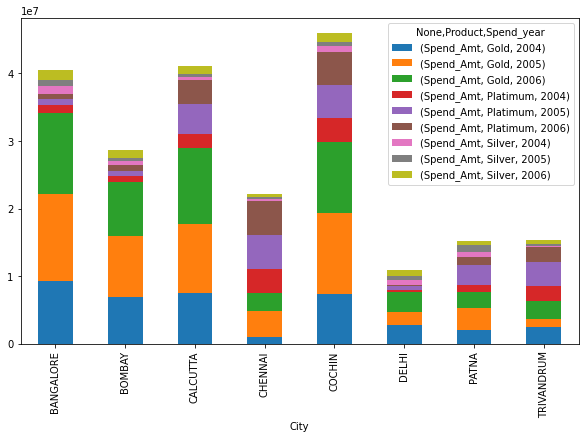

In [62]:
year_city_spend.plot.bar(figsize=(10,6), stacked=True)
plt.show()

--------------------------------------------

### 4. Create graphs for
a. Monthly comparison of total spends, city wise

In [74]:
monthly_wise_spend = csr.pivot_table(index= ['City'],columns=['Month_s_name'], values=['Spend_Amt'], aggfunc=np.sum)
monthly_wise_spend

Spend_Amt                                                  \
Month_s_name       April      August   December    February      January   
City                                                                       
BANGALORE     4207980.48   695061.95  422167.24  6734494.76   9041796.84   
BOMBAY        1873785.01  1066744.75  140040.71  4276988.30   5948993.33   
CALCUTTA      3457507.95  1548354.02   55001.50  8150545.61   9064864.90   
CHENNAI       2518656.99   305875.97  223628.27  4385815.95   4466961.36   
COCHIN        3882744.94  2317306.61  909533.05  5747886.38  11714373.54   
DELHI          777240.75   155402.16  842342.02  1494064.06   2714261.45   
PATNA         2338179.53   419383.64   50000.00  2353333.55   4916205.55   
TRIVANDRUM    1199293.45   453773.94  640922.26  2857123.89   3704336.99   

                                                                          \
Month_s_name        July        June       March         May    November   
City                                                                       
BANGALORE     2228217.69  1330685.90  5362903.07  6383115.13  2260603.07   
BOMBAY         177726.32  1172594.97  5227850.50  3891945.60  2872049.40   
CALCUTTA      2234573.27  2293045.81  4939040.04  5578246.87  2078880.93   
CHENNAI        693825.77  1244242.16  3183643.71  2856199.62  1347779.28   
COCHIN        1290897.30  2495745.07  5645146.53  6581085.69  3127999.60   
DELHI           50001.50   511276.09  2267149.02  1600322.07   391610.96   
PATNA           50000.00   746186.13  1437166.61  2136586.80   413677.87   
TRIVANDRUM     260484.50   400336.83  2392316.51  2813534.48   143387.40   

                                      
Month_s_name     October   September  
City                                  
BANGALORE     1091602.61   703018.28  
BOMBAY         676005.70  1278402.79  
CALCUTTA       196357.83  1511713.57  
CHENNAI        156247.17   745759.40  
COCHIN         868551.89  1382242.90  
DELHI           64615.46    50001.00  
PATNA          329537.34    70329.95  
TRIVANDRUM     285581.92   186063.70

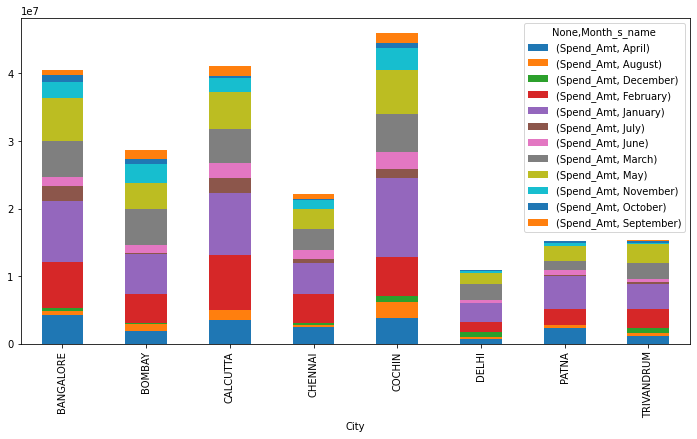

In [77]:
monthly_wise_spend.plot.bar(figsize=(12,6),stacked=True)
plt.show()

### 4.b. Comparison of yearly spend on air tickets

In [98]:
csr_airticket = csr[csr.Type == 'AIR TICKET'].reset_index(drop=True)

In [101]:
csr_airticket.head(3)

,Customer,Age,City,Product,Limit,Company,Segment,Spend_Month,Type,Spend_Amt,Repay_Month,Repay_Amt,Month_s_name,Month_r_name,Monthly_Profit,Profit,Age_Group,Spend_year
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2006-04-19,AIR TICKET,346925.68,2006-04-19,79849.19,April,April,-267076.49,0.00,Senior,2006
1,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary,2006-03-03,AIR TICKET,5001.00,2005-11-20,478284.25,March,November,473283.25,13725.21,Adult,2006
2,A6,70.0,DELHI,Silver,100000.0,C6,Self Employed,2006-04-03,AIR TICKET,50000.00,2006-11-21,53215.28,April,November,3215.28,93.24,Senior,2006


In [141]:
air_year_spend = csr_airticket.groupby(['Spend_year'])[['Spend_Amt']].sum()
air_year_spend

,Spend_Amt
Spend_year,
2004,4357225.35
2005,10550152.21
2006,5248469.56


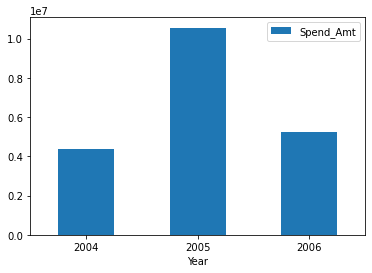

In [144]:
air_year_spend.plot(kind='bar')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.show()

### 4.c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [145]:
monthly_product_spend = csr.pivot_table(index= ['Product'],columns=['Month_s_name'], values=['Spend_Amt'], aggfunc=np.sum)
monthly_product_spend

Spend_Amt                                                    \
Month_s_name        April      August    December     February      January   
Product                                                                       
Gold          13170572.59  4954030.42  2332940.96  24779179.55  32413831.83   
Platimum       5182493.86  1714762.80   750156.19   9134054.58  14951578.51   
Silver         1902322.65   293109.82   200537.90   2087018.37   4206383.62   

                                                                            \
Month_s_name        July        June        March          May    November   
Product                                                                      
Gold          5167416.37  6538862.64  19256972.48  21548169.76  9203267.46   
Platimum      1288156.26  2965712.71   7288837.68   8151926.49  2741618.42   
Silver         530153.72   689537.61   3909405.83   2140940.01   691102.63   

                                      
Month_s_name     October   September  
Product                               
Gold          3018223.38  3816887.62  
Platimum       550275.04  1667840.84  
Silver         100001.50   442803.13

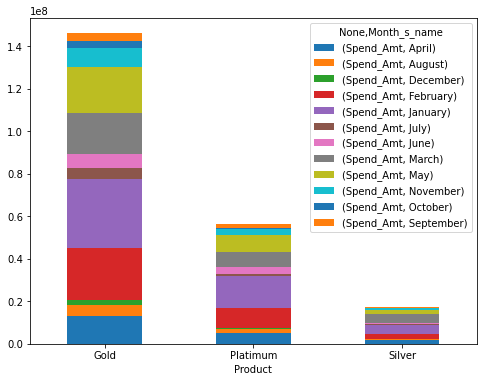

In [148]:
monthly_product_spend.plot.bar(figsize=(8,6),stacked=True)
plt.xticks(rotation=0)
plt.show()

The spend across the products is highest in the months of January, February and lowest in the month of Decemeber. The spend deecreases as the year moves from January to December.

--------------------------------------------

### 5. Write user defined PYTHON function to perform the following analysis:

You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. 
The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [123]:
# Step1: Creating columns for Month and Year :

csr['Month'] = csr['Repay_Month'].apply(lambda x:x.month)
csr['Year'] = csr['Repay_Month'].apply(lambda x:x.year)

In [64]:
Product_list = csr.Product.unique()
Product_list

array(['Gold', 'Silver', 'Platimum'], dtype=object)

In [161]:
# Step 2: Creating fun and Taking input from the user for Period and Month:

def repay_cust(product, period):
    
    product = str(input("Enter the Product name: ")).capitalize()
    period  = str(input ("Enter the Period - Month Wise or Year: ")).capitalize()
    
    return csr.loc[(csr.Product == product)].groupby(['Customer','City', 'Product',period])['Repay_Amt'].sum().sort_values(ascending=False).reset_index().head(10)

In [162]:
repay_cust = repay_cust(product, period)
repay_cust

Enter the Product name: PLATIMUM
Enter the Period - Month Wise or Year: YEAR


,Customer,City,Product,Year,Repay_Amt
0,A47,CHENNAI,Platimum,2005,3806037.49
1,A39,TRIVANDRUM,Platimum,2005,3699578.97
2,A21,COCHIN,Platimum,2005,3667493.35
3,A36,BOMBAY,Platimum,2006,3339582.21
4,A56,CHENNAI,Platimum,2006,3295868.87
5,A48,TRIVANDRUM,Platimum,2006,3288900.75
6,A54,COCHIN,Platimum,2006,3255687.64
7,A21,COCHIN,Platimum,2004,3149664.32
8,A38,CHENNAI,Platimum,2006,3111018.69
9,A48,TRIVANDRUM,Platimum,2005,3087667.17
